#  Loading the IMDB dataset

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [ ]:
train_data[0][0: 5]

[1, 14, 22, 16, 43]

In [ ]:
train_labels[0]

1

In [ ]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


# Encoding the integer sequences into a binary matrix


In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
 x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#  The model definition

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#  Compiling the model

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Setting aside a validation set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training your model

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 17s 60ms/step - loss: 0.5873 - accuracy: 0.7023 - val_loss: 0.3788 - val_accuracy: 0.8742
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3138 - accuracy: 0.9046 - val_loss: 0.3106 - val_accuracy: 0.8825
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2256 - accuracy: 0.9316 - val_loss: 0.2901 - val_accuracy: 0.8826
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1707 - accuracy: 0.9496 - val_loss: 0.2906 - val_accuracy: 0.8840
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1441 - accuracy: 0.9570 - val_loss: 0.2833 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1105 - accuracy: 0.9702 - val_loss: 0.2941 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0917 - accuracy: 0.9759 - val_loss: 0.3220 - val_accuracy: 0.8779
Epoch 8/20
3

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plotting the training and validation loss


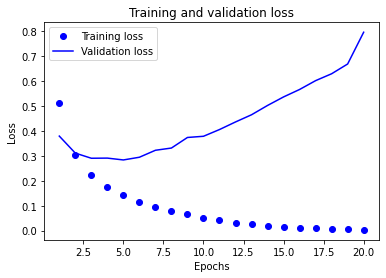

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 20 + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()